In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Batch Normalization

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.astype(float)
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)

In [4]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
X = np.array(X)
y = np.array(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization

model1 = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(X, y, epochs=1000, validation_split=0.25, batch_size=40, verbose=2)

Epoch 1/1000
3/3 - 1s - 183ms/step - accuracy: 0.7589 - loss: 1.0237 - val_accuracy: 0.0000e+00 - val_loss: 1.4415
Epoch 2/1000
3/3 - 0s - 6ms/step - accuracy: 0.8929 - loss: 0.8842 - val_accuracy: 0.0000e+00 - val_loss: 1.7137
Epoch 3/1000
3/3 - 0s - 6ms/step - accuracy: 0.8929 - loss: 0.7658 - val_accuracy: 0.0000e+00 - val_loss: 1.8550
Epoch 4/1000
3/3 - 0s - 6ms/step - accuracy: 0.8929 - loss: 0.6529 - val_accuracy: 0.0000e+00 - val_loss: 2.0470
Epoch 5/1000
3/3 - 0s - 7ms/step - accuracy: 0.8929 - loss: 0.5502 - val_accuracy: 0.0000e+00 - val_loss: 2.0822
Epoch 6/1000
3/3 - 0s - 7ms/step - accuracy: 0.8929 - loss: 0.4526 - val_accuracy: 0.0000e+00 - val_loss: 1.8879
Epoch 7/1000
3/3 - 0s - 6ms/step - accuracy: 0.8929 - loss: 0.3681 - val_accuracy: 0.0000e+00 - val_loss: 1.6653
Epoch 8/1000
3/3 - 0s - 6ms/step - accuracy: 0.8929 - loss: 0.3014 - val_accuracy: 0.0000e+00 - val_loss: 1.3054
Epoch 9/1000
3/3 - 0s - 6ms/step - accuracy: 0.8929 - loss: 0.2531 - val_accuracy: 0.0000e+00 

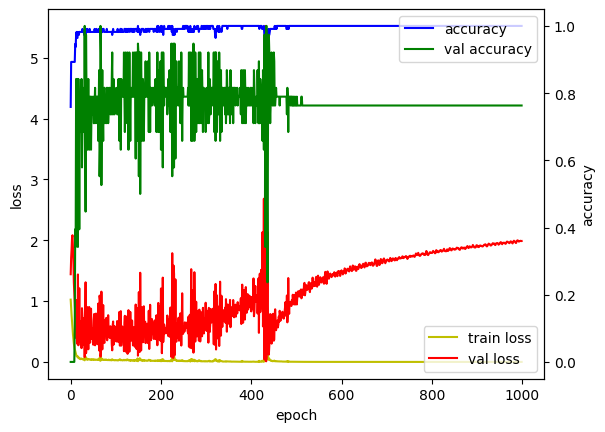

In [7]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history1.history['loss'], 'y', label='train loss')
loss_ax.plot(history1.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history1.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(history1.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [8]:
loss_and_metircs = model1.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9333 - loss: 0.7750


In [9]:
from tensorflow.keras.initializers import RandomNormal, Constant

model2 = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.95, epsilon=0.005, beta_initializer=RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=Constant(value=0.9)),
    Dense(3, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X, y, epochs=1000, validation_split=0.25, batch_size=40, verbose=2)

Epoch 1/1000
3/3 - 1s - 372ms/step - accuracy: 0.6518 - loss: 0.9718 - val_accuracy: 0.5263 - val_loss: 0.9373
Epoch 2/1000
3/3 - 0s - 7ms/step - accuracy: 0.9375 - loss: 0.2147 - val_accuracy: 1.0000 - val_loss: 0.8507
Epoch 3/1000
3/3 - 0s - 6ms/step - accuracy: 0.9821 - loss: 0.0972 - val_accuracy: 1.0000 - val_loss: 0.8095
Epoch 4/1000
3/3 - 0s - 6ms/step - accuracy: 0.9821 - loss: 0.0813 - val_accuracy: 1.0000 - val_loss: 0.7786
Epoch 5/1000
3/3 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0398 - val_accuracy: 1.0000 - val_loss: 0.7609
Epoch 6/1000
3/3 - 0s - 6ms/step - accuracy: 0.9911 - loss: 0.0375 - val_accuracy: 1.0000 - val_loss: 0.7482
Epoch 7/1000
3/3 - 0s - 6ms/step - accuracy: 0.9821 - loss: 0.0461 - val_accuracy: 1.0000 - val_loss: 0.7401
Epoch 8/1000
3/3 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 0.7358
Epoch 9/1000
3/3 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 0.7408
Epoch 10/1000
3/3

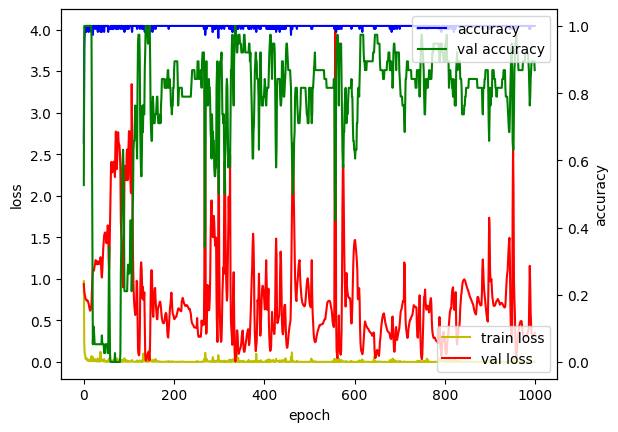

In [10]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history2.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [11]:
model2.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9667 - loss: 0.0871


[0.08710180222988129, 0.9666666388511658]

Dropout

In [12]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [13]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True, as_supervised=True
)

padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [14]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

2024-07-02 11:30:17.893779: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


array([[ 398,  198,   46, ...,  160, 5748, 7975],
       [8002, 7968,  123, ...,    0,    0,    0],
       [  12,  284,   14, ...,    0,    0,    0],
       ...,
       [  12,   70,  316, ...,    0,    0,    0],
       [1284, 1517, 2808, ...,    0,    0,    0],
       [ 518, 3962,   38, ...,    0,    0,    0]])

In [15]:
encoder = info.features['text'].encoder
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 320s 128ms/step - accuracy: 0.4942 - loss: 0.6936 - val_accuracy: 0.5100 - val_loss: 0.6901
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 328s 131ms/step - accuracy: 0.5180 - loss: 0.6846 - val_accuracy: 0.5600 - val_loss: 0.6742
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 338s 135ms/step - accuracy: 0.5230 - loss: 0.6687 - val_accuracy: 0.5467 - val_loss: 0.7024
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 337s 135ms/step - accuracy: 0.5344 - loss: 0.6615 - val_accuracy: 0.5400 - val_loss: 0.6826
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 336s 134ms/step - accuracy: 0.5339 - loss: 0.6561 - val_accuracy: 0.5133 - val_loss: 0.6680


2024-07-02 11:57:56.315861: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


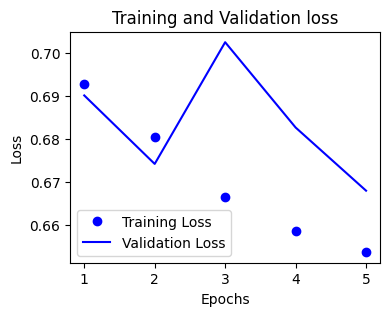

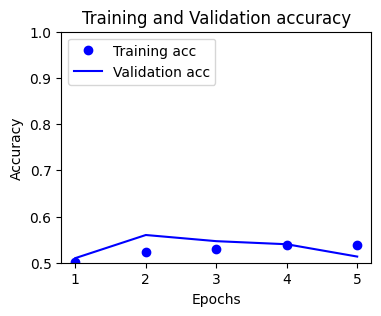

In [16]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.ylim((0.5,1))
plt.show()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1114s 445ms/step - accuracy: 0.5179 - loss: 0.6927 - val_accuracy: 0.5100 - val_loss: 0.6891
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1136s 454ms/step - accuracy: 0.6450 - loss: 0.6391 - val_accuracy: 0.8700 - val_loss: 0.3355
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1157s 463ms/step - accuracy: 0.8725 - loss: 0.3150 - val_accuracy: 0.8733 - val_loss: 0.3292
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1134s 454ms/step - accuracy: 0.9276 - loss: 0.2009 - val_accuracy: 0.9133 - val_loss: 0.2300
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1161s 464ms/step - accuracy: 0.9566 - loss: 0.1367 - val_accuracy: 0.8800 - val_loss: 0.3871


2024-07-02 13:32:58.563288: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


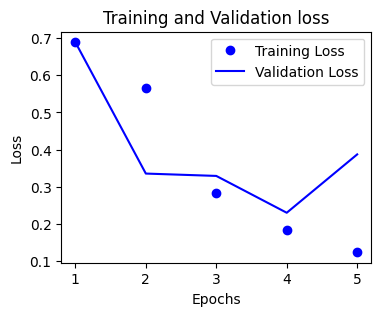

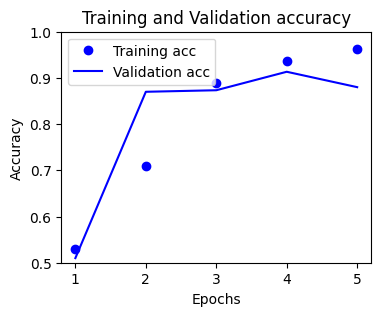

In [18]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.ylim((0.5,1))
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1103s 440ms/step - accuracy: 0.6015 - loss: 0.6504 - val_accuracy: 0.8233 - val_loss: 0.4813
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1115s 446ms/step - accuracy: 0.8451 - loss: 0.3748 - val_accuracy: 0.8900 - val_loss: 0.2705
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1116s 446ms/step - accuracy: 0.9174 - loss: 0.2194 - val_accuracy: 0.8867 - val_loss: 0.2848
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1109s 443ms/step - accuracy: 0.9477 - loss: 0.1478 - val_accuracy: 0.8900 - val_loss: 0.2882
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1118s 447ms/step - accuracy: 0.9732 - loss: 0.0855 - val_accuracy: 0.8700 - val_loss: 0.3716


2024-07-02 15:05:39.798657: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


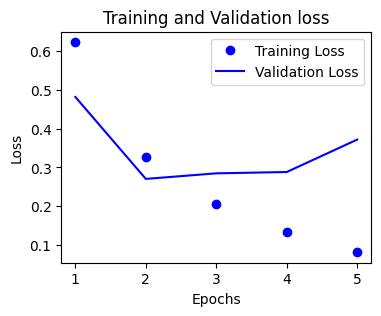

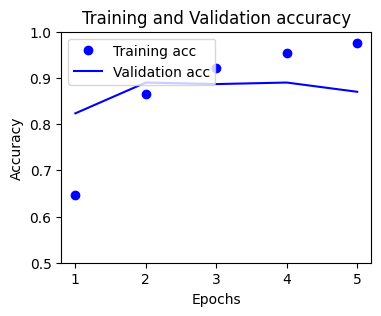

In [20]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.ylim((0.5,1))
plt.show()

Early Stopping

In [21]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np

In [22]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 300
np.random.seed(7)

In [24]:
import os

checkpoint_path = 'training_1/cp.keras'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1)

In [26]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [31]:
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:200]
y_test = y_test[:200]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1000, 400), (1000,), (200, 400), (200,))

In [32]:
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[cp_callback])

Epoch 1/300


/opt/miniconda3/envs/py311/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5044 - loss: 0.6974
Epoch 1: saving model to training_1/cp.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5043 - loss: 0.6974 - val_accuracy: 0.5350 - val_loss: 0.6899
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5295 - loss: 0.6884
Epoch 2: saving model to training_1/cp.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5296 - loss: 0.6885 - val_accuracy: 0.4650 - val_loss: 0.6948
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5553 - loss: 0.6830
Epoch 3: saving model to training_1/cp.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5574 - loss: 0.6829 - val_accuracy: 0.6550 - val_loss: 0.6790
Epoch 4/300
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7304 - loss: 0.6498
Epoch 4: saving model to training_1/cp.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7273 - loss: 0.6474 - val_accuracy: 0.6800 - val_loss: 0.6605
Epoch 5/300
25/25 ━━━━━━

In [33]:
from tensorflow.keras.models import load_model
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7714 - loss: 1.2684 
Score: loss of 1.3884248733520508; compile_metrics of 0.7549999952316284


In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

keras_callback = [
    EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=keras_callback)

Epoch 1/300


/opt/miniconda3/envs/py311/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5321 - loss: 0.6943 - val_accuracy: 0.5350 - val_loss: 0.6893
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5129 - loss: 0.6937 - val_accuracy: 0.5350 - val_loss: 0.6895
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5419 - loss: 0.6849 - val_accuracy: 0.5800 - val_loss: 0.6820
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7277 - loss: 0.6441 - val_accuracy: 0.5950 - val_loss: 0.6657
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7513 - loss: 0.5246 - val_accuracy: 0.6900 - val_loss: 0.5959
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8962 - loss: 0.3790 - val_accuracy: 0.7450 - val_loss: 0.5400
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9509 - loss: 0.2074 - val_accuracy: 0.7700 - val_loss: 0.5105
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9792 - loss: 0.0990 - val_accuracy: 0.7600 - val_l

In [36]:
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7751 - loss: 0.3945 
Score: loss of 0.4227824807167053; compile_metrics of 0.7799999713897705
